In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.pairwise import pairwise_distances_argmin



In [3]:
np.random.seed(42)

In [4]:
df_b=pd.read_csv('df_behaviour.csv',delimiter=',')
df_d=pd.read_csv('df_demo.csv',delimiter=',')
df_p=pd.read_csv('df_psy.csv',delimiter=',')

# BEHAVIOUR SEGMENT

In [5]:
df_b.set_index('customer_id',inplace=True)

In [6]:
metric_features_b=df_b.columns

In [7]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_b)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_b, cluster_labels)
    avg_silhouette.append(silhouette_avg)


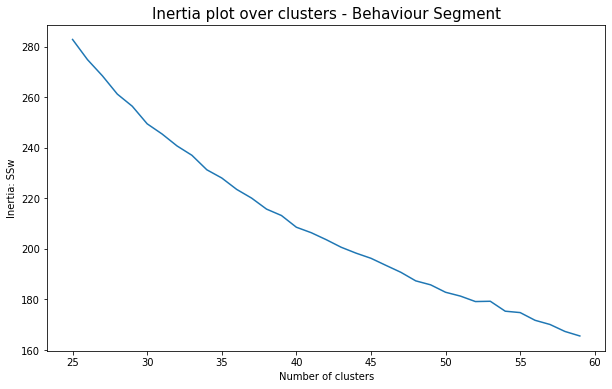

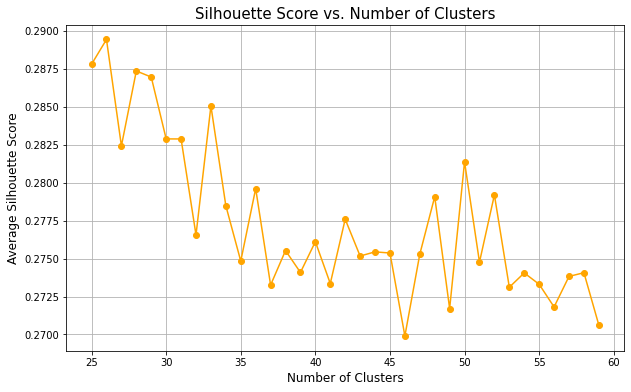

In [8]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters - Behaviour Segment", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [16]:
kmeans = KMeans(n_clusters=26, random_state=42)
kmeans_labels = kmeans.fit_predict(df_b)
centroids_b = kmeans.cluster_centers_

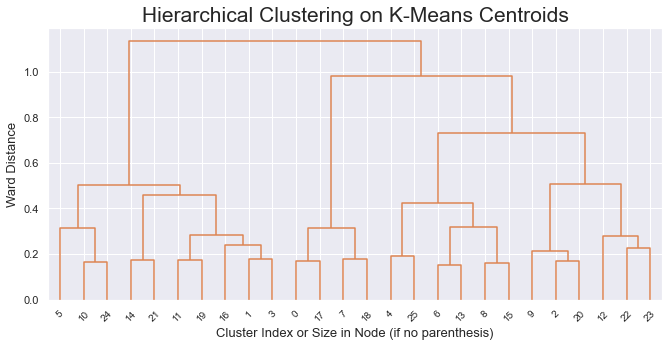

In [10]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids_b)

# Prepare variables
n_samples = len(centroids_b)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [17]:
hclust = AgglomerativeClustering(
    n_clusters=5,  # Specify the desired number of clusters
    linkage="ward"
)
hierarchical_labels_b = hclust.fit_predict(centroids_b)
final_labels_b = np.zeros(len(df_b), dtype=int)
for i in range(len(df_b)):
    point = df_b.iloc[i].values.reshape(1, -1)
    nearest_centroid = pairwise_distances_argmin(point, centroids_b)[0]
    final_labels_b[i] = hierarchical_labels_b[nearest_centroid]

In [18]:
df_b['cluster'] = final_labels_b

In [19]:
silhouette_avg_b = silhouette_score(df_b, final_labels_b)
print("The average silhouette score is :", silhouette_avg_b)

The average silhouette score is : 0.7754060473582374


# Demographic Segment

In [20]:
df_d.set_index('customer_id',inplace=True)

In [15]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_d[['customer_age']])

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_d[['customer_age']], cluster_labels)
    avg_silhouette.append(silhouette_avg)

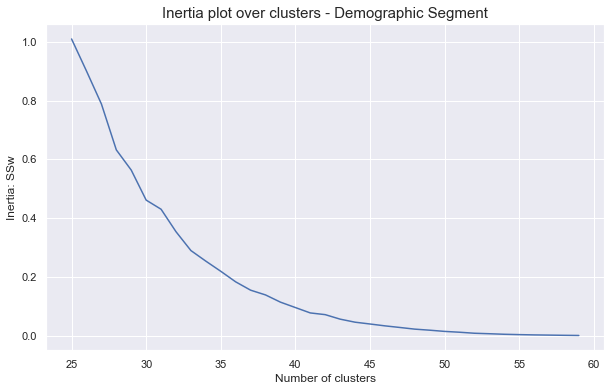

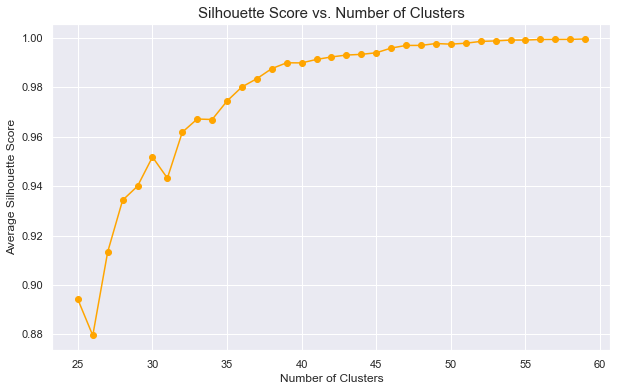

In [16]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters - Demographic Segment", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [22]:
kmeans = KMeans(n_clusters=39, random_state=42)
kmeans_labels = kmeans.fit_predict(df_d)
centroids_d = kmeans.cluster_centers_

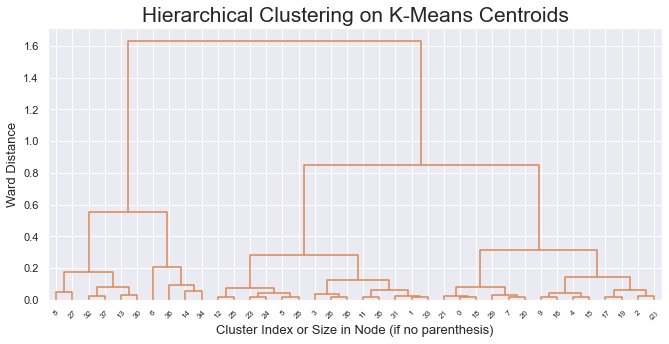

In [23]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids_d)

# Prepare variables
n_samples = len(centroids_d)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [30]:
hclust = AgglomerativeClustering(
    n_clusters=4,  # Specify the desired number of clusters
    linkage="ward"
)
hierarchical_labels_d = hclust.fit_predict(centroids_d)
final_labels_d = np.zeros(len(df_d), dtype=int)
for i in range(len(df_d)):
    point = df_d[['customer_age']].iloc[i].values.reshape(1, -1)
    nearest_centroid = pairwise_distances_argmin(point, centroids_d)[0]
    final_labels_d[i] = hierarchical_labels_d[nearest_centroid]

In [31]:
df_d['cluster'] = final_labels_d

In [32]:
silhouette_avg_d = silhouette_score(df_d, final_labels_d)
print("The average silhouette score is :", silhouette_avg_d)

The average silhouette score is : 0.9460475834250842


# Psychographic Segment

In [33]:
df_p.set_index('customer_id',inplace=True)

In [23]:
cluster_range = range(25, 60)

# Lists to store evaluation metrics
inertia = []
avg_silhouette = []

# Iterate over the range of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=42)
    cluster_labels = kmeans.fit_predict(df_p)

    # Compute and store Inertia
    inertia.append(kmeans.inertia_)

    # Compute and store Average Silhouette Score
    silhouette_avg = silhouette_score(df_p, cluster_labels)
    avg_silhouette.append(silhouette_avg)

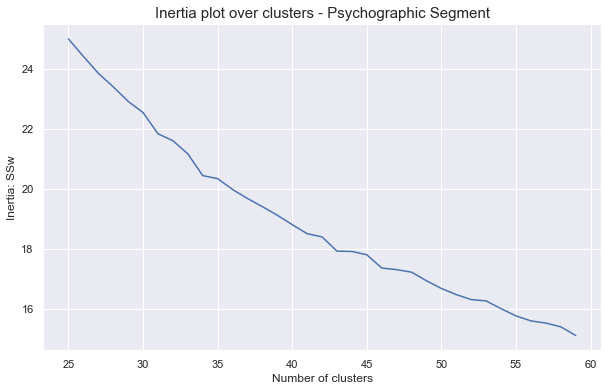

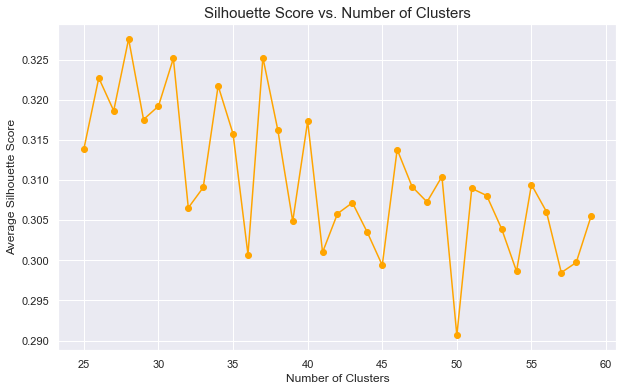

In [24]:
plt.figure(figsize=(10,6))
plt.plot(cluster_range, inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters - Psychographic Segment", size=15)
plt.show()

# Plot Average Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, avg_silhouette, marker='o', color='orange')
plt.title("Silhouette Score vs. Number of Clusters", size=15)
plt.xlabel("Number of Clusters", size=12)
plt.ylabel("Average Silhouette Score", size=12)
plt.grid(True)
plt.show()

In [39]:
kmeans = KMeans(n_clusters=28, random_state=42)
kmeans_labels = kmeans.fit_predict(df_p)
centroids_p = kmeans.cluster_centers_

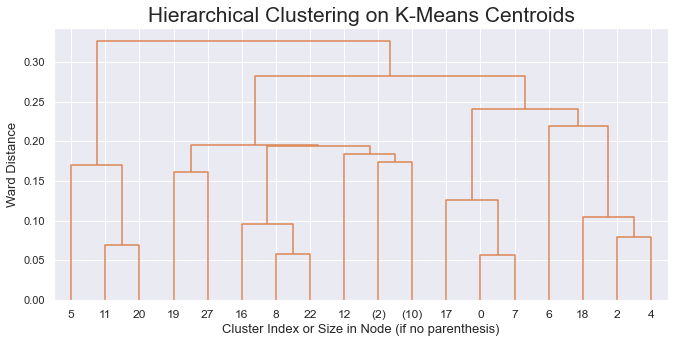

In [26]:
hclust = AgglomerativeClustering(
    n_clusters=None,  # Specify `None` to build the hierarchy fully
    distance_threshold=0,  # Build the dendrogram to include all merges
    linkage="ward"
)

hclust.fit(centroids_p)

# Prepare variables
n_samples = len(centroids_p)
counts = np.zeros(hclust.children_.shape[0], dtype=int)

# Calculate counts for each merge
for i, merge in enumerate(hclust.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # Leaf node (centroid)
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# Create linkage matrix for dendrogram
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Step 3: Plot the Dendrogram
sns.set()
fig = plt.figure(figsize=(11, 5))

# Dendrogram settings
y_threshold = 100  # Adjust this based on your data's distance scale
dendrogram(
    linkage_matrix,
    truncate_mode="level",  # Show clusters up to a certain depth
    p=5,  # Number of levels to show
    color_threshold=y_threshold,  # Coloring based on threshold
    above_threshold_color="k"  # Default color above the threshold
)

# Highlight the threshold
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")

# Titles and labels
plt.title("Hierarchical Clustering on K-Means Centroids", fontsize=21)
plt.xlabel("Cluster Index or Size in Node (if no parenthesis)", fontsize=13)
plt.ylabel("Ward Distance", fontsize=13)
plt.show()

In [43]:
hclust = AgglomerativeClustering(
    n_clusters=6,  # Specify the desired number of clusters
    linkage="ward"
)
hierarchical_labels_p = hclust.fit_predict(centroids_p)
final_labels_p = np.zeros(len(df_p), dtype=int)
for i in range(len(df_p)):
    point = df_p.iloc[i].values.reshape(1, -1)
    nearest_centroid = pairwise_distances_argmin(point, centroids_p)[0]
    final_labels_p[i] = hierarchical_labels_d[nearest_centroid]

In [44]:
df_p['cluster'] = final_labels_p

In [45]:
silhouette_avg_p = silhouette_score(df_p, final_labels_p)
print("The average silhouette score is :", silhouette_avg_p)

The average silhouette score is : 0.9301446354359026


# Results

In [56]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst
    
def get_r2_scores(df, clusterer, min_k=2, max_k=10):
    """
    Loop over different values of k. To be used with sklearn clusterers.
    """
    r2_clust = {}
    for n in range(min_k, max_k):
        clust = clone(clusterer).set_params(n_clusters=n)
        labels = clust.fit_predict(df)
        r2_clust[n] = r2(df, labels)
    return r2_clust

r2_scores = []
r2_scores.append(r2(df_b, 'cluster'))
r2_scores.append(r2(df_d, 'cluster'))
r2_scores.append(r2(df_p, 'cluster'))

C:\Users\Casa-PC\AppData\Local\Temp/ipykernel_12204/2990717814.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw = np.sum(df.groupby(labels).apply(get_ss))
C:\Users\Casa-PC\AppData\Local\Temp/ipykernel_12204/2990717814.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ssw = np.sum(df.groupby(labels).apply(get_ss))
C:\Users\Casa-PC\AppData\Local\Temp/ipykernel_12204/2990717814.py:9: DeprecationWarnin

In [58]:
silhouette_scores = [silhouette_avg_b, silhouette_avg_d, silhouette_avg_p]

segments = ['Behaviour', 'Demographic', 'Psychographic']

table = pd.DataFrame({
    'Segment': segments,
    'Silhouette Score': silhouette_scores,
    'r2 Score': r2_scores
})

print(table)

         Segment  Silhouette Score  r2 Score
0      Behaviour          0.775406  0.976126
1    Demographic          0.946048  0.996026
2  Psychographic          0.930145  0.992871


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Assuming df_psy and df_demo are already loaded DataFrames

def tsne_visualization(data, cluster_column, title):
    # Separate features and labels
    features = data.drop(columns=[cluster_column])
    labels = data[cluster_column]

    # Normalize features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(features_scaled)

    # Create scatter plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Cluster Label')
    plt.title(f'T-SNE Visualization of {title}')
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.show()

# Visualize df_psy
tsne_visualization(df_p, cluster_column='cluster', title='Psychological Data Clusters')

# Visualize df_demo
tsne_visualization(df_b, cluster_column='cluster', title='Demographic Data Clusters')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\anaconda\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\anaconda\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "d:\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "d:\anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "d:\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "d:\anaconda\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\anaconda\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "d:\anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "d:\anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "d:\anaconda\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io_loop

AttributeError: _ARRAY_API not found

NameError: name 'df_p' is not defined